In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow的版本为", tf.__version__)

data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()
print("训练集的大小为", X_train.shape)
print("测试集的大小为", X_test.shape)

TensorFlow的版本为 2.5.0
训练集的大小为 (60000, 28, 28)
测试集的大小为 (10000, 28, 28)


imshow()可以将像素点矩阵转化为图片

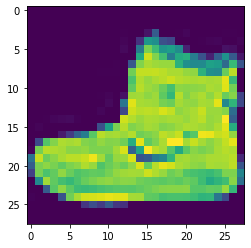

In [32]:
plt.figure()
plt.imshow(X_train[0])
plt.show()

数据预处理，将数据归一化后再交给神经网络去训练

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

以下是一个卷积神经网络的实现。keras.Sequential是keras中的顺序模型，是多个网络层的线性堆叠。Conv2D和MaxPooling2D分别是卷积层和池化层，分别用于特征提取和压缩图像。Flatten层将输入的数据展开成一维便于传入全连接层。隐层Dense全连接层使用relu激活函数，输出层使用softmax激活函数。

In [34]:
tf.random.set_seed(191300085)

model1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)), # 第一个卷积层, 32 个3x3 卷积核
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # 第二个卷积层, 32 个3x3 卷积核
    keras.layers.MaxPooling2D(pool_size=2,strides=2), 
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

模型的一些设置。损失函数选择SparseCategoricalCrossentropy()，本质上是交叉熵，不同的是交叉熵输入的是one-hot编码的向量，而它输入的是整数。metrics是评价指标，这里采用分类的正确率。

In [35]:
model1.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

训练模型，model.fit返回一个对象，通过该对象可以对训练过程中的训练集和验证集进行精度和损失关于epoch的折线图的绘制。

In [36]:
def showHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

Epoch 1/20
1688/1688 - 18s - loss: 0.4878 - accuracy: 0.8227 - val_loss: 0.3875 - val_accuracy: 0.8580
Epoch 2/20
1688/1688 - 18s - loss: 0.3253 - accuracy: 0.8819 - val_loss: 0.2996 - val_accuracy: 0.8870
Epoch 3/20
1688/1688 - 18s - loss: 0.2807 - accuracy: 0.8965 - val_loss: 0.2925 - val_accuracy: 0.8923
Epoch 4/20
1688/1688 - 18s - loss: 0.2504 - accuracy: 0.9078 - val_loss: 0.2671 - val_accuracy: 0.8968
Epoch 5/20
1688/1688 - 18s - loss: 0.2272 - accuracy: 0.9154 - val_loss: 0.2419 - val_accuracy: 0.9105
Epoch 6/20
1688/1688 - 18s - loss: 0.2039 - accuracy: 0.9239 - val_loss: 0.2466 - val_accuracy: 0.9095
Epoch 7/20
1688/1688 - 18s - loss: 0.1872 - accuracy: 0.9303 - val_loss: 0.2635 - val_accuracy: 0.9072
Epoch 8/20
1688/1688 - 18s - loss: 0.1712 - accuracy: 0.9359 - val_loss: 0.2443 - val_accuracy: 0.9135
Epoch 9/20
1688/1688 - 18s - loss: 0.1578 - accuracy: 0.9405 - val_loss: 0.2581 - val_accuracy: 0.9137
Epoch 10/20
1688/1688 - 18s - loss: 0.1444 - accuracy: 0.9455 - val_loss:

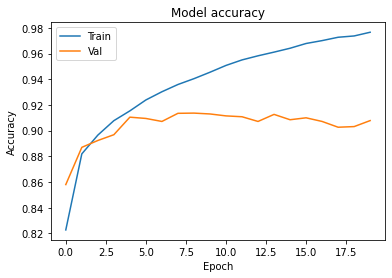

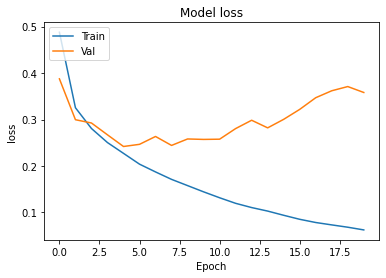

测试集损失为: 0.38998594880104065
测试集准确率为: 0.9046000242233276


In [37]:
history = model1.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, validation_split=0.1, verbose=2)
showHistory(history)
test_loss, test_acc = model1.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('测试集损失为:', test_loss)
print('测试集准确率为:', test_acc)

模型2相比于模型1增加了更多的卷积核，同时减少了训练的轮数以限制过拟合。可见结果确实比模型1更好，猜测更多的卷积核学习到的特征比较少的卷积核更精确。

Epoch 1/9
1688/1688 - 22s - loss: 0.4450 - accuracy: 0.8410 - val_loss: 0.3734 - val_accuracy: 0.8647
Epoch 2/9
1688/1688 - 21s - loss: 0.3035 - accuracy: 0.8877 - val_loss: 0.2773 - val_accuracy: 0.8992
Epoch 3/9
1688/1688 - 23s - loss: 0.2585 - accuracy: 0.9039 - val_loss: 0.2722 - val_accuracy: 0.9005
Epoch 4/9
1688/1688 - 22s - loss: 0.2266 - accuracy: 0.9167 - val_loss: 0.2588 - val_accuracy: 0.9055
Epoch 5/9
1688/1688 - 22s - loss: 0.2010 - accuracy: 0.9250 - val_loss: 0.2366 - val_accuracy: 0.9123
Epoch 6/9
1688/1688 - 24s - loss: 0.1767 - accuracy: 0.9347 - val_loss: 0.2326 - val_accuracy: 0.9182
Epoch 7/9
1688/1688 - 23s - loss: 0.1559 - accuracy: 0.9417 - val_loss: 0.2749 - val_accuracy: 0.9060
Epoch 8/9
1688/1688 - 22s - loss: 0.1400 - accuracy: 0.9480 - val_loss: 0.2611 - val_accuracy: 0.9095
Epoch 9/9
1688/1688 - 21s - loss: 0.1214 - accuracy: 0.9537 - val_loss: 0.2647 - val_accuracy: 0.9140


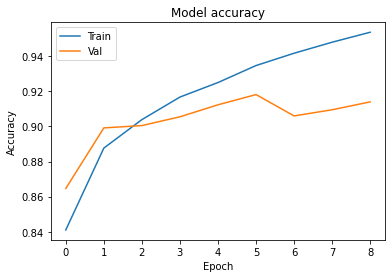

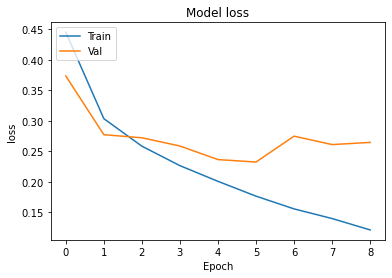

测试集损失为: 0.2772730588912964
测试集准确率为: 0.911300003528595


In [51]:
tf.random.set_seed(191300085)
model2 = keras.Sequential([
    keras.layers.Conv2D(64, (2, 2), activation='relu',input_shape=(28, 28, 1)), # 第一个卷积层, 64 个2x2 卷积核
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(64, (2, 2), activation='relu'), # 第二个卷积层, 64 个2x2 卷积核
    keras.layers.MaxPooling2D(pool_size=2,strides=2), 
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') 
])
model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history2 = model2.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=9, validation_split=0.1, verbose=2)
showHistory(history2)
test_loss, test_acc = model2.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('测试集损失为:', test_loss)
print('测试集准确率为:', test_acc)

绘制卷积和池化层的feature_map和saliency_map，参考

https://towardsdatascience.com/practical-guide-for-visualizing-cnns-using-saliency-maps-4d1c2e13aeca

https://usmanr149.github.io/urmlblog/cnn/2020/05/01/Salincy-Maps.html

从saliency_map中可以看出模型对鞋子的识别重点放在了鞋身斜口等轮廓上，这符合人的认知。

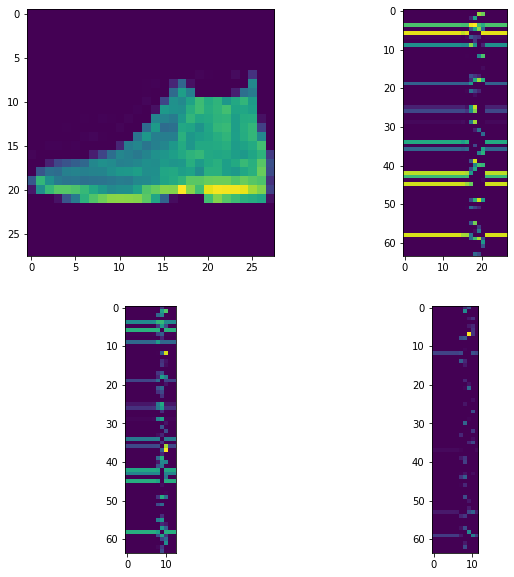

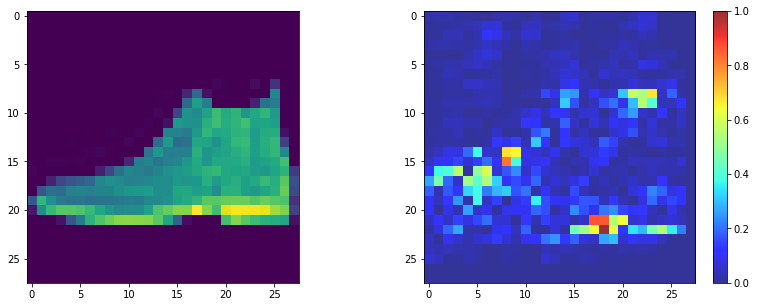

In [62]:
from random import randint
import matplotlib.pylab as plt 

def get_feature_maps(model, layer_id, input_image):
    model_ = keras.models.Model(inputs=[model.input], 
                   outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, 
                                         axis=0))[0,:,:,:].transpose((2,0,1))

def plot_features_map(img_idx=0, layer_idx=[0, 1, 2], 
                      x_test=X_test, ytest=y_test, cnn=model2):

    input_image = x_test[img_idx]
    fig, ax = plt.subplots(2, 2,figsize=(10,10))
    ax[0][0].imshow(input_image)
    
    for i, l in enumerate(layer_idx):
        feature_map = get_feature_maps(cnn, l, input_image)
        ax[(i+1)//2][(i+1)%2].imshow(feature_map[:,:,0])
    return img_idx

def plot_saliency_map(X_test, model, img_idx=0):
    _img = X_test[0]
    img = keras.preprocessing.image.img_to_array(_img)
    img = img.reshape((1, *img.shape))  # 对图片进行预处理，适应模型
    images = tf.Variable(img, dtype=float)
    with tf.GradientTape() as tape: # 计算梯度
        pred = model2(images, training=False)
        class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
        loss = pred[0][class_idxs_sorted[0]]
        
    grads = tape.gradient(loss, images)

    dgrad_abs = tf.math.abs(grads)

    dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

    arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
    grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    
plot_features_map(img_idx=0)
plot_saliency_map(X_test, model2, img_idx=0)

模型3增添了两个新的卷积层，并且采用了批归一化和dropout的技术处理。批归一化通过对一批数据进行归一化可缓解神经网络中“梯度弥散”的问题，同时也可以增加收敛速度。dropout层通过使部分神经元的输出为0使神经网络更看重整体特征以降低过拟合的风险。模型3的效果是3个模型中最好的，达到了0.925的分类准确率。

Epoch 1/15
1688/1688 [==============================] - 74s 44ms/step - loss: 0.4512 - accuracy: 0.8356 - val_loss: 0.3446 - val_accuracy: 0.8715
Epoch 2/15
1688/1688 [==============================] - 71s 42ms/step - loss: 0.2979 - accuracy: 0.8895 - val_loss: 0.2823 - val_accuracy: 0.8975
Epoch 3/15
1688/1688 [==============================] - 72s 42ms/step - loss: 0.2601 - accuracy: 0.9041 - val_loss: 0.2879 - val_accuracy: 0.8925
Epoch 4/15
1688/1688 [==============================] - 72s 43ms/step - loss: 0.2351 - accuracy: 0.9132 - val_loss: 0.2586 - val_accuracy: 0.9062
Epoch 5/15
1688/1688 [==============================] - 71s 42ms/step - loss: 0.2128 - accuracy: 0.9211 - val_loss: 0.2380 - val_accuracy: 0.9145
Epoch 6/15
1688/1688 [==============================] - 72s 42ms/step - loss: 0.1967 - accuracy: 0.9266 - val_loss: 0.2176 - val_accuracy: 0.9200
Epoch 7/15
1688/1688 [==============================] - 72s 43ms/step - loss: 0.1834 - accuracy: 0.9312 - val_loss: 0.2164 -

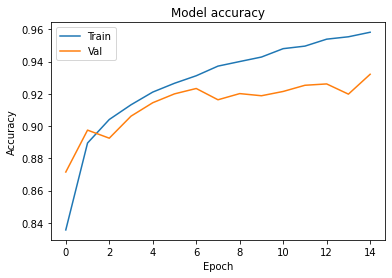

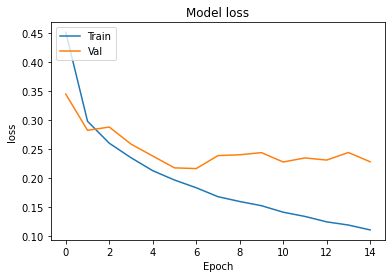

测试集损失为: 0.25462237000465393
测试集准确率为: 0.9258000254631042


In [82]:
tf.random.set_seed(191300085)
model3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)), #32个2x2卷积核
    keras.layers.Conv2D(32, (3, 3), activation='relu'), #32个2x2卷积核
    keras.layers.BatchNormalization(), # 批归一化
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64个2x2 卷积核
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(), # 批归一化
    keras.layers.MaxPooling2D(pool_size=2,strides=2), 
    keras.layers.Dropout(.2),
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') 
])
model3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history2 = model3.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=15, validation_split=0.1, verbose=1)
showHistory(history2)
test_loss, test_acc = model3.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print('测试集损失为:', test_loss)
print('测试集准确率为:', test_acc)


以下代码画出了模型3的除输出外的卷积层的3个filter。参考

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

conv2d_52 (3, 3, 1, 32)
conv2d_53 (3, 3, 32, 32)
conv2d_54 (3, 3, 32, 64)
conv2d_55 (3, 3, 64, 64)


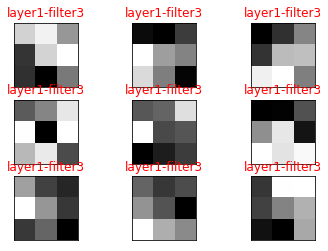

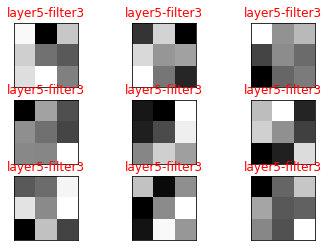

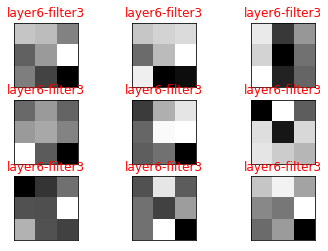

In [111]:
from matplotlib import pyplot

# summarize filter shapes
for layer in model3.layers:
	# 去除非卷积层
	if 'conv' not in layer.name:
		continue
	# 以numpy列表形式返回层的权重
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 
def plot_filters(model, idx_layers):
	filters, biases = model.layers[idx_layers].get_weights()

	# 归一化
	f_min, f_max = filters.min(), filters.max()
	filters = (filters - f_min) / (f_max - f_min)

	n_filters, ix = 3, 1
	for i in range(n_filters):
		# get the filter
		f = filters[:, :, :, i]
		# plot each channel separately
		for j in range(3):
			# specify subplot and turn of axis
			ax = pyplot.subplot(n_filters, 3, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			ax.set_title('layer%d-filter%d'%(idx_layers, n_filters), c='red')
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, j], cmap='gray')
			ix += 1
	pyplot.show()
 
plot_filters(model3, 1)
plot_filters(model3, 5)
plot_filters(model3, 6)